# 04.10 - Customizing Ticks

This section will give several examples of adjusting the tick locations and formatting for the particular plot type we're interested in.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

### Major and Minor Ticks

Within each axis, there is the concept of a _major_ tick mark, and a _minor_ tick mark (rarely used, most notably for logarithmic plots): 

### Hiding Ticks or Labels

Ticks can be hidden using <code>plt.NullLocator()</code> and <code>plt.NullFormatter()</code>:

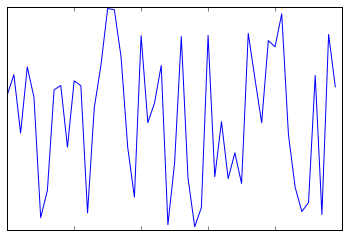

In [7]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())        # no ticks, no labels
ax.xaxis.set_major_formatter(plt.NullFormatter())    # yes ticks, no labels

### Reducing or Increasing the Number of Ticks

Sometimes, a great number of subplots leads to a crowded plot:

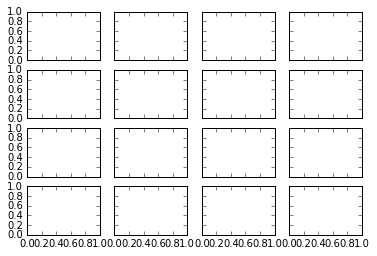

In [8]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

 We can fix this with the <code>plt.MaxNLocator()</code>, which allows us to specify the maximum number of ticks that will be displayed:

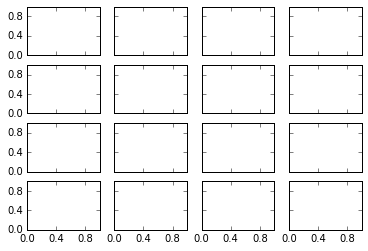

In [9]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

### Fancy Tick Formats

Customing ticks (both in terms of spacing and format) can be extremely useful. Let's take the sine and cosine plot as an example:

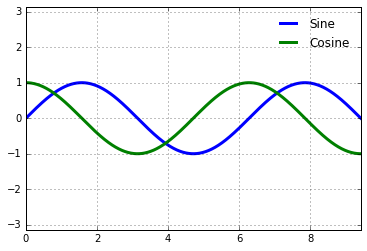

In [10]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

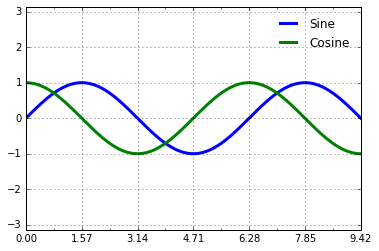

In [12]:
# major ticks spaced pi/2
# minor ticks spaced pi/4
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

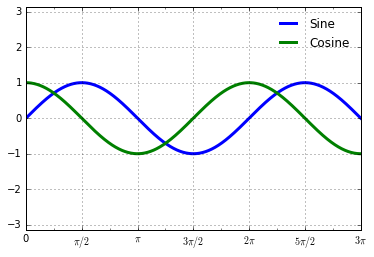

In [13]:
# formatting ticks to display multiples of pi

def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

As we can see, Matplotlib support LaTeX (within <code>$</code>). 

### Summary of Formatters and Locators

<pre>
Locator class 	  Description

NullLocator 	    No ticks
FixedLocator 	   Tick locations are fixed
IndexLocator 	   Locator for index plots (e.g., where x = range(len(y)))
LinearLocator 	  Evenly spaced ticks from min to max
LogLocator 	     Logarithmically ticks from min to max
MultipleLocator 	Ticks and range are a multiple of base
MaxNLocator 	    Finds up to a max number of ticks at nice locations
AutoLocator 	    (Default.) MaxNLocator with simple defaults.
AutoMinorLocator    Locator for minor ticks

Formatter Class 	Description

NullFormatter 	  No labels on the ticks
IndexFormatter 	 Set the strings from a list of labels
FixedFormatter 	 Set the strings manually for the labels
FuncFormatter 	  User-defined function sets the labels
FormatStrFormatter 	Use a format string for each value
ScalarFormatter     (Default.) Formatter for scalar values
LogFormatter 	   Default formatter for log axes

</pre>